Importation des Bibliothéques

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import io
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings; warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
from sklearn.metrics import roc_curve, roc_auc_score


# Importation de la Dataset

In [ ]:
uploaded = files.upload()

df=pd.read_csv("diabetes.csv")

Saving diabetes.csv to diabetes (1).csv


In [ ]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

# EAD

Aperçu des premières lignes:

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Aperçu des dernières lignes:

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Dimensions du DataFrame (nombre de lignes , nombre de colonnes)

In [ ]:
df.shape

(768, 9)

Aperçu de la structure des données:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Aperçu des statistiques pour chaque colonne (moyenne, écart-type, minimum, maximum, quartiles)

In [ ]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


Distribution des résultats de diabète :

In [ ]:
df.Outcome.value_counts()

,count
Outcome,
0,500
1,268


<Axes: xlabel='Outcome', ylabel='count'>

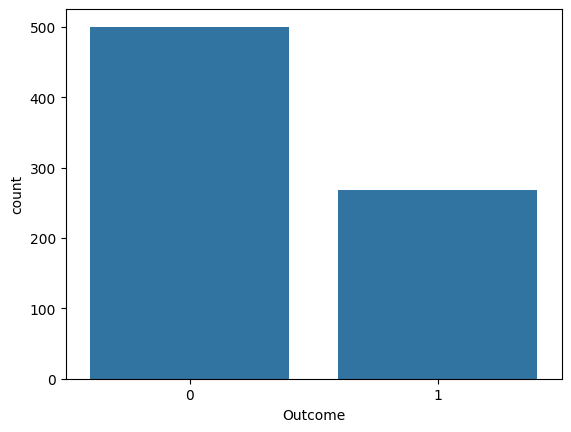

In [ ]:
sns.countplot(x='Outcome', data=df)

 Détection des valeurs aberrantes:

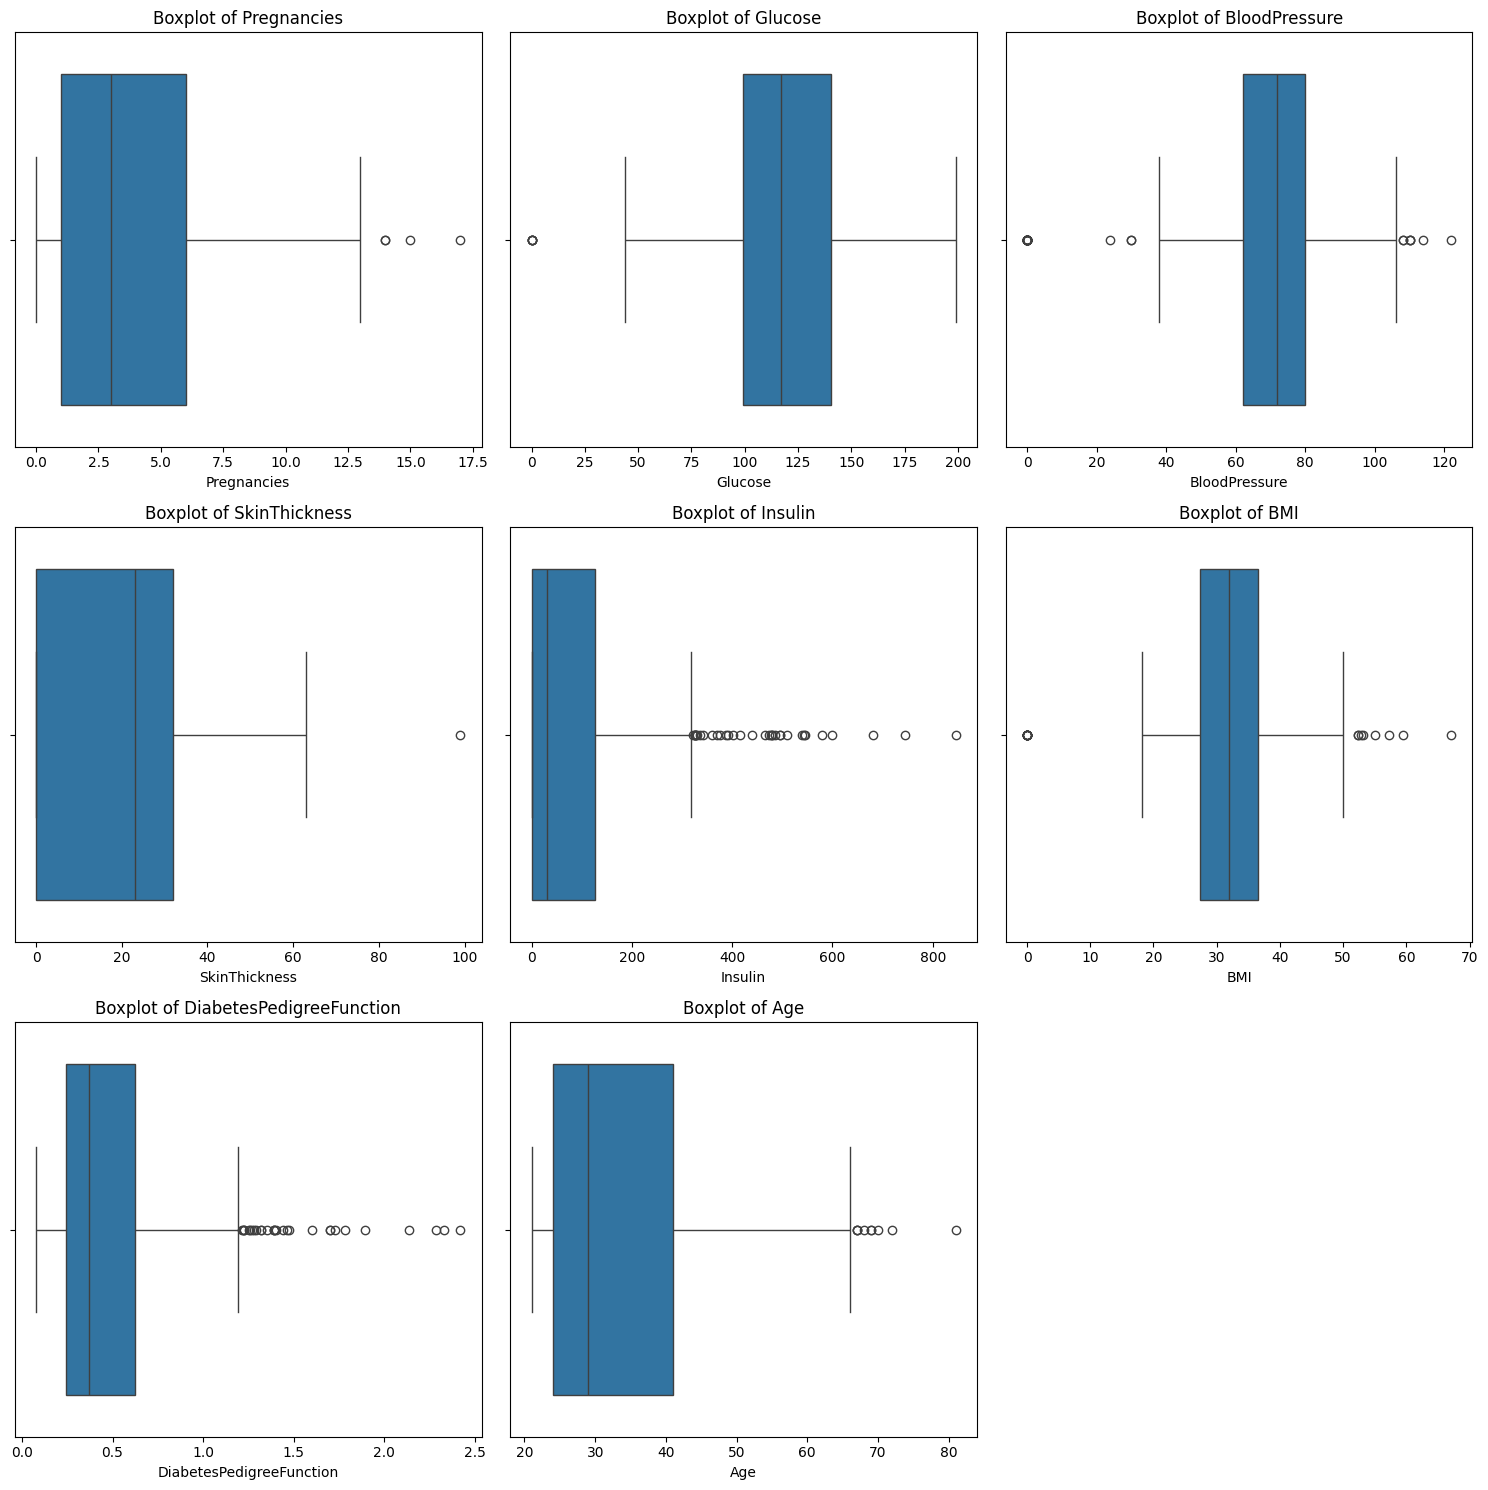

In [ ]:
num_rows = (len(df.columns) + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

j=0
for i, column in enumerate(df):
  if column != 'Outcome':
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    j+=1


for i in range(j, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Détection des doublons:

In [ ]:
print(df.duplicated().sum())

0


Analyse des distributions :

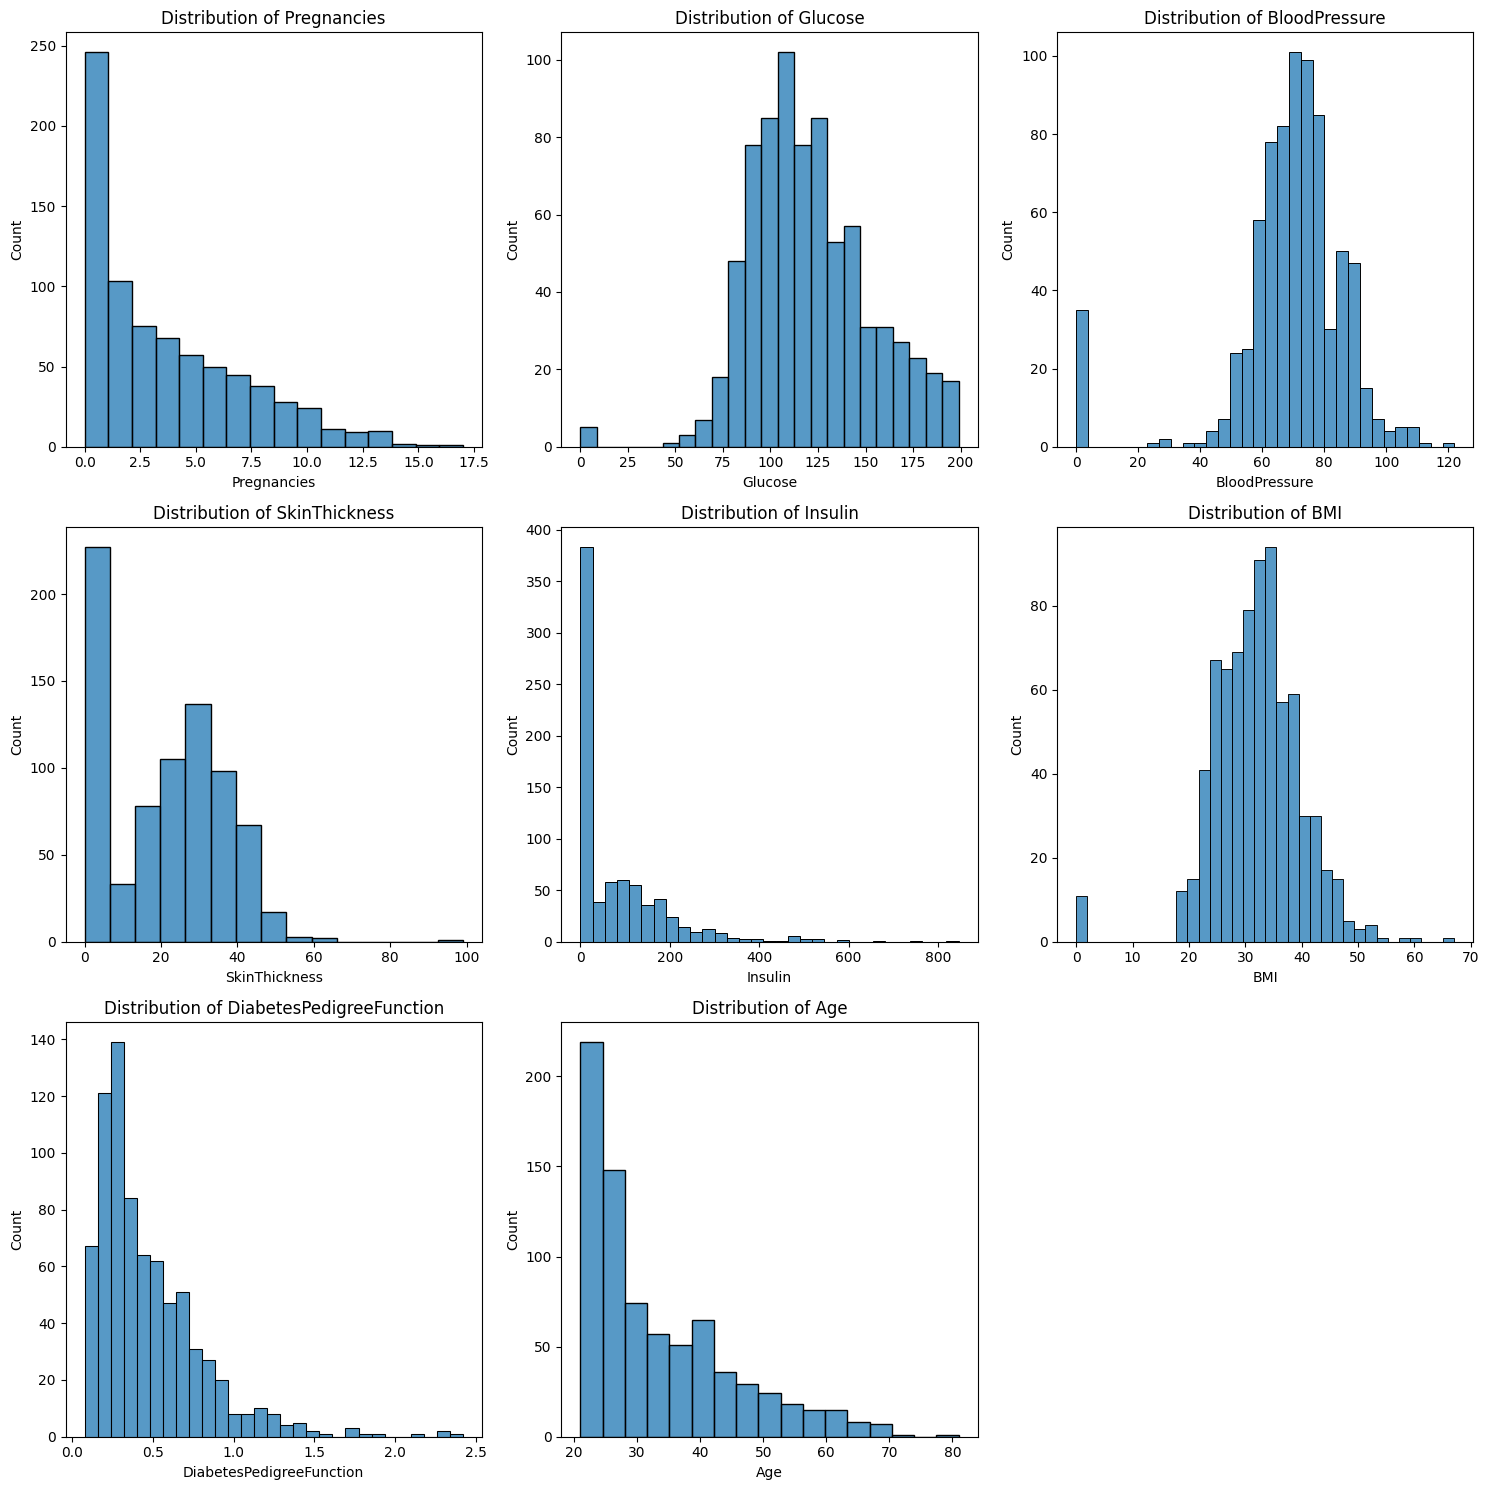

In [ ]:
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()


for i, column in enumerate(X.columns):
    sns.histplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')


for i in range(len(X.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

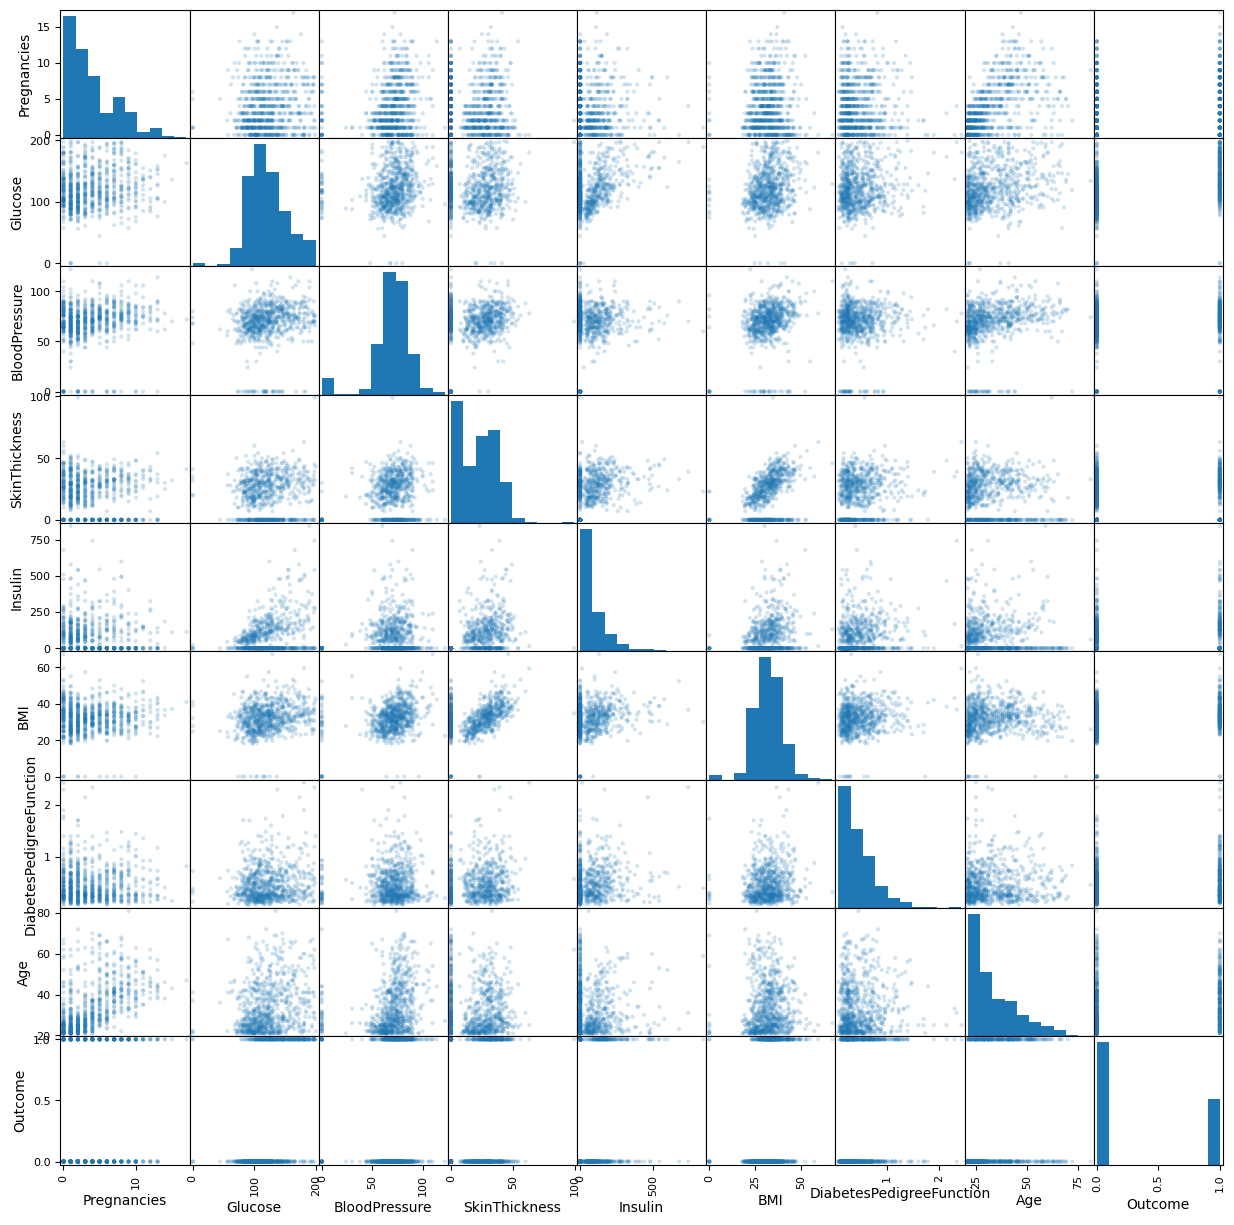

In [ ]:
scatter_matrix(df, alpha=0.2, figsize  = [15, 15],marker   = ".")
plt.show()


Aperçu de la matrice de corrélation:

Ce code aide à visualiser les relations entre les caractéristiques du jeu de données et la variable cible, puis à identifier les caractéristiques les plus importantes en fonction de leur corrélation avec Outcome. Cela permet de mieux comprendre les données et de guider le processus de prétraitement avant la modélisation.

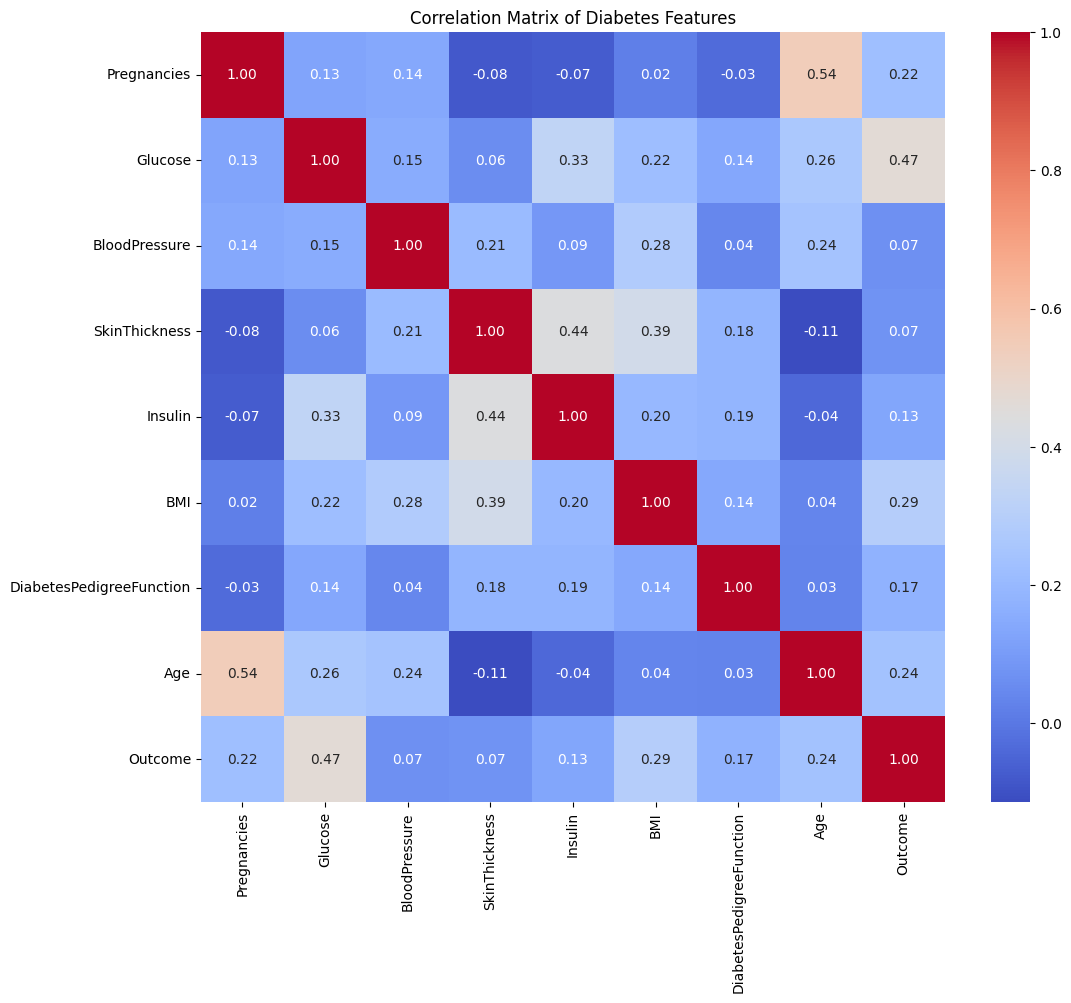

Important features based on correlation:
Glucose        0.466581
BMI            0.292695
Age            0.238356
Pregnancies    0.221898
Name: Outcome, dtype: float64


In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Diabetes Features')
plt.show()


outcome_correlation = correlation_matrix['Outcome'].drop('Outcome')
important_features_corr = outcome_correlation[abs(outcome_correlation) > 0.2].sort_values(ascending=False)

print("Important features based on correlation:")
print(important_features_corr)

# Prétraitement des données

Traitement des valeurs manquantes:

Dans cette partie on a remplacé les 0 dans les colonnes :"Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","Age" par NaN car dans ces colonnes la valeur 0 représente une valeur manquante plutot q'une valeur valide


In [ ]:
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","Age"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

On a traité les valeurs manquantes en les remplaçant par la médiane

In [ ]:
for col in X.columns:
        df.loc[(df["Outcome"] == 0) & (df[col].isnull()), col] = df[df["Outcome"] == 0][col].median()
        df.loc[(df["Outcome"] == 1) & (df[col].isnull()), col] = df[df["Outcome"] == 1][col].median()


Traitement des valeurs aberrantes:


Ici on a utilisé la méthode de Winsorisation pour limiter les valeurs extrêmes dans les colonnes "BloodPressure", "SkinThickness", "Insulin", "BMI".L'objectif principal de la Winsorisation est de traiter les valeurs aberrantes (outliers) présentes dans les données tout en conservant la majorité de la structure des données.Ce code vise à réduire l'impact des valeurs aberrantes dans les colonnes sélectionnées, rendant les modèles de machine learning plus robustes et les analyses plus fiables.

In [ ]:
cols_to_winsorize = ["BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=[0.1, 0.1])

On a enlevé les colonnes BloodPressure et SkinThikness car leurs correlations avec "Outcome" est très faible donc ils n'ont pas d'effet sur l'Outcome.

In [ ]:
X = df.drop(columns=['Outcome',"BloodPressure", "SkinThickness"])
Y = df['Outcome']

Normalisation des données

Ici on a normalisé notre Dataframe à l'aide de la méthode de standardisation pour mettre les données sur la même échelle ,ce qui permet d'améliorer la performance et la stabilité des algorithmes de machine learning

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Division des données en ensembles d'entraînement et de test:

Ici on a divisé notre dataframe en un ensemble d'entrainement et de test pour simuler un scénario dans lequel le modèle est entraîné sur un sous-ensemble des données et testé sur un autre sous-ensemble afin de mesurer sa capacité de généralisation et d'identifier les problèmes potentiels de surapprentissage.

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

Application de SMOTE sur les données d'entraînement:

Dans cette partie on a utilisé la méthode SMOTE  pour traiter le problème du déséquilibre des classes dans un ensemble de données  en créant de nouveaux échantillons synthétiques pour la classe minoritaire. Un déséquilibre important peut entraîner un modèle biaisé en faveur de la classe majoritaire.

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Distribution des classes après SMOTE :")
print(y_train.value_counts())

Distribution des classes après SMOTE :
Outcome
0    349
1    349
Name: count, dtype: int64


# Visualisation des données

Aperçu des premiéres lignes:

In [ ]:
X_train = pd.DataFrame(X_train, columns=["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"])
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,-0.844885,-0.876258,-1.396090,-1.464892,-0.639892,-0.956462
1,0.342981,-0.547790,1.765625,0.834813,-0.944924,-0.445935
2,-1.141852,0.437616,1.765625,1.654863,-0.322779,-0.786286
3,0.046014,0.306228,0.792789,0.157380,-0.941903,-0.445935
4,-0.844885,-0.613483,-1.042332,1.654863,-0.872441,-0.020496


Aperçu des dernières lignes:

In [ ]:
X_train.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
693,0.417900,0.601850,0.870174,1.475778,-0.089870,0.405719
694,0.018142,-0.108926,0.870174,-0.467148,-0.297319,-0.283746
695,0.838692,-0.690296,0.870174,-0.348091,-0.267052,0.006987
696,-0.844885,1.224290,0.138270,-1.042326,-0.207498,0.321992
697,-1.141852,1.023713,0.870174,1.287578,-0.377651,-0.518721


Dimensions du DataFrame (nombre de lignes , nombre de colonnes)


In [ ]:
X_train.shape

(698, 6)

In [ ]:
X_train.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,698.0,0.016821,0.982448,-1.141852,-1.141852,-0.844885,-0.250952,0.639947,1.519897,1.827813,2.579961,3.906578
Glucose,698.0,0.178850,1.015258,-2.551447,-1.237573,-0.547790,0.043454,0.798931,1.750279,2.119962,2.442259,2.539814
BloodPressure,698.0,0.192149,0.960656,-1.396090,-1.396090,-0.611189,0.297582,0.870174,1.551076,1.765625,1.765625,1.765625
SkinThickness,698.0,0.081594,0.994969,-1.464892,-1.464892,-0.783003,0.103899,0.888079,1.633962,1.654863,1.654863,1.654863
Insulin,698.0,0.063336,1.096553,-1.189553,-0.993245,-0.645932,-0.233686,0.458933,1.229260,2.090916,5.039844,5.883565
BMI,698.0,0.061111,0.977232,-1.041549,-1.041549,-0.707505,-0.231555,0.744334,1.428661,1.952953,2.872685,4.063716


Distribution des classes après SMOTE et augmentation:

In [ ]:
y_train.value_counts()

,count
Outcome,
0,349
1,349


<Axes: xlabel='Outcome', ylabel='count'>

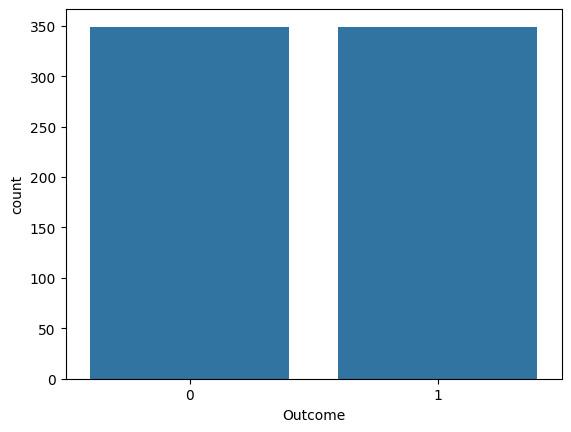

In [ ]:
y_train = pd.DataFrame(y_train, columns=["Outcome"])
sns.countplot(x='Outcome', data=y_train)

Visualisation des valeurs aberrantes:

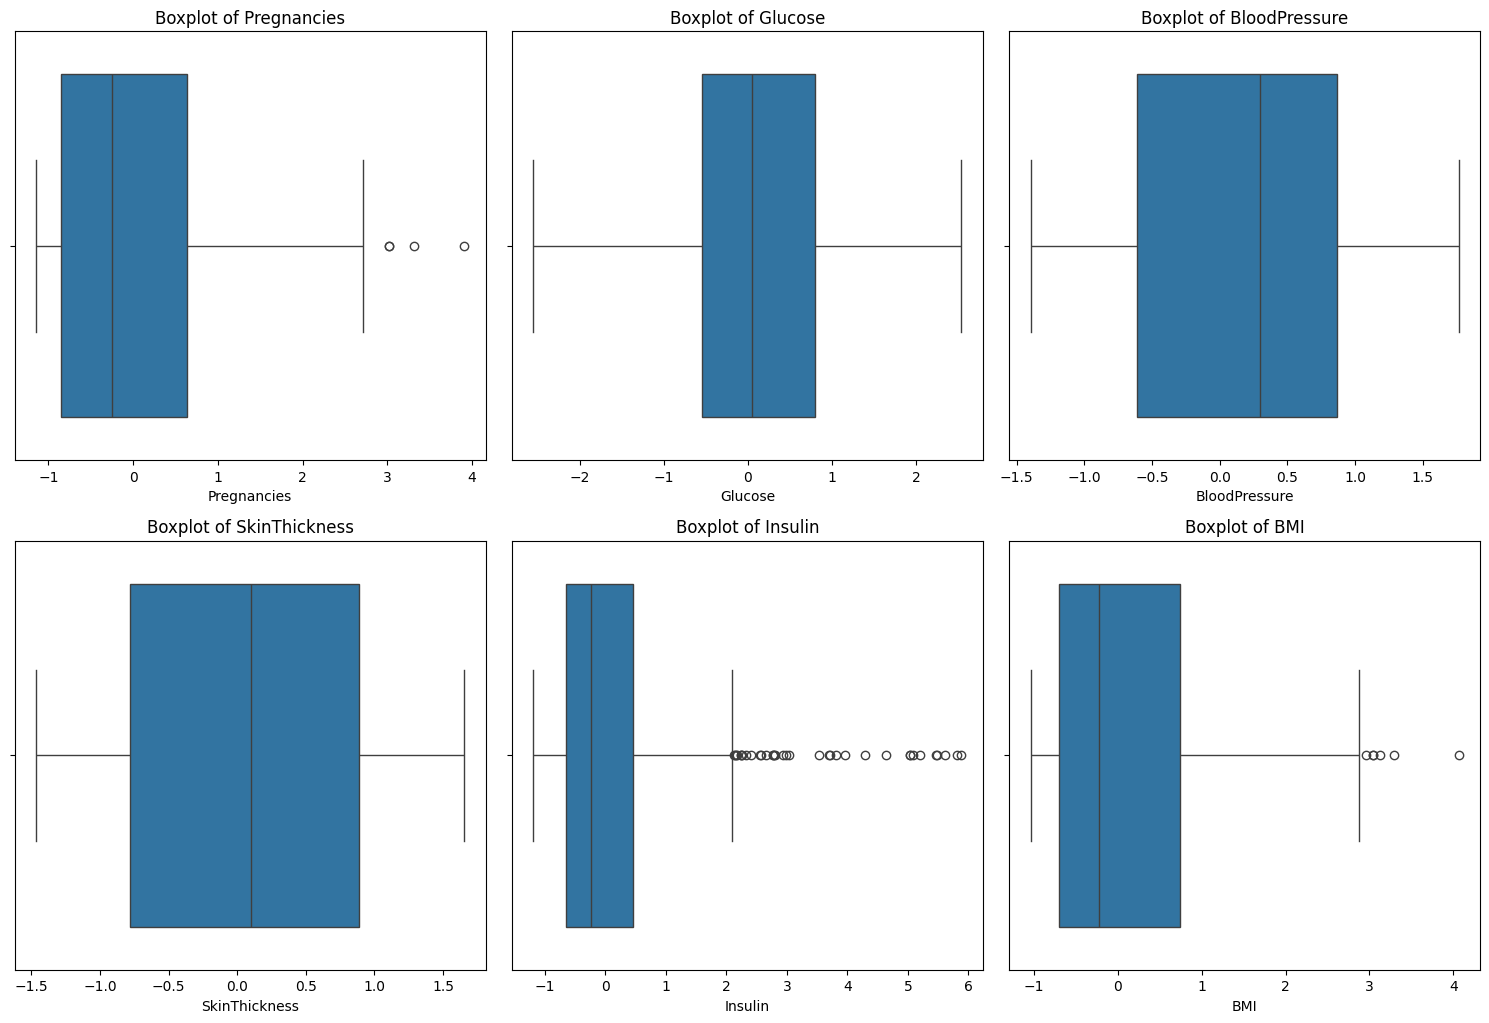

In [ ]:
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, column in enumerate(X_train.columns): # Iterate through columns of X
    sns.boxplot(data=X_train, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove extra subplots if any
for i in range(len(X_train.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Visualisation des valeurs manquantes:

In [ ]:
X_train.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


Analyse des distributions :

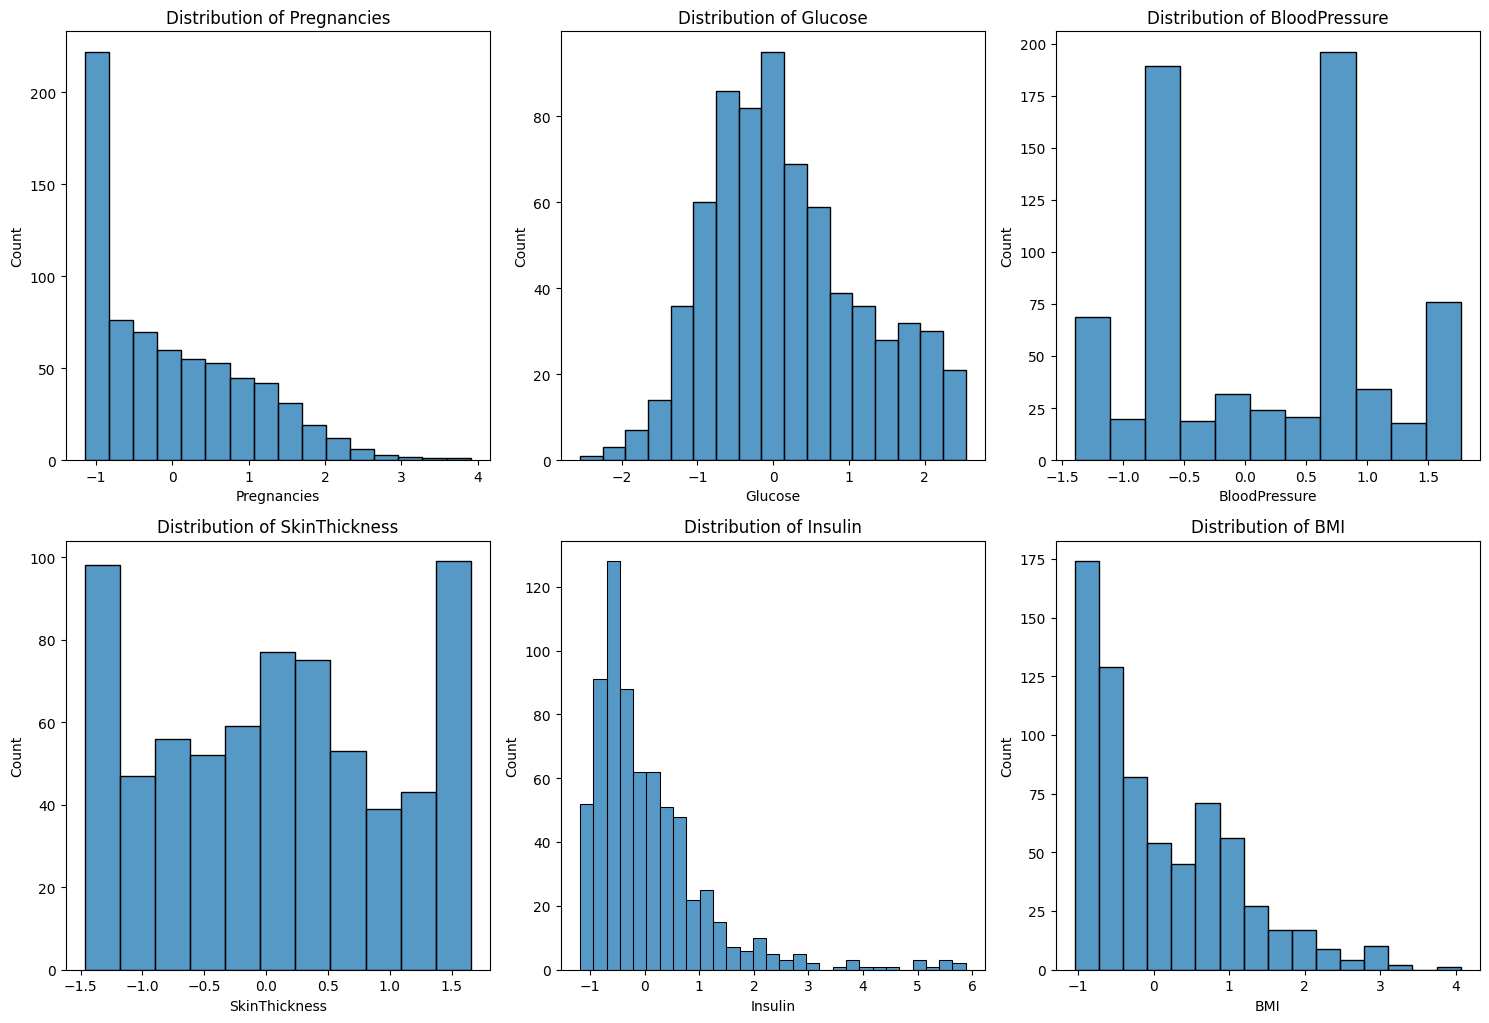

In [ ]:
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()


for i, column in enumerate(X_train.columns):
    sns.histplot(data=X_train, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')


for i in range(len(X_train.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# KNN

Performances du modèle KNN avec les paramètres par défaut :
Accuracy: 85.71%
Precision: 73.33%
Recall: 88.00%
F1-Score: 0.80
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        52
           1       0.73      0.88      0.80        25

    accuracy                           0.86        77
   macro avg       0.83      0.86      0.84        77
weighted avg       0.87      0.86      0.86        77


Meilleurs hyperparamètres trouvés :
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Performances du modèle KNN avec les meilleurs hyperparamètres :
Accuracy: 85.71%
Precision: 75.00%
Recall: 84.00%
F1-Score: 0.79
              precision    recall  f1-score   support

           0       0.92      0.87      0.89        52
           1       0.75      0.84      0.79        25

    accuracy                           0.86        77
   macro avg       0.83      0.85      0.84        77
weighted avg       0.86      0.86      0.86 

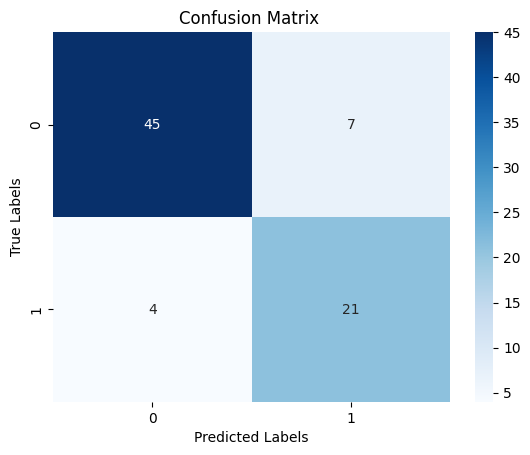

In [ ]:
# 1. Entraînement du modèle KNN avec les paramètres par défaut
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_knn_pred = knn_model.predict(X_val)

# 2. Évaluation du modèle avec les paramètres par défaut
acc = accuracy_score(y_val, y_knn_pred)
prec = precision_score(y_val, y_knn_pred)
rec = recall_score(y_val, y_knn_pred)
f1 = f1_score(y_val, y_knn_pred)

print("Performances du modèle KNN avec les paramètres par défaut :")
print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(prec * 100))
print("Recall: {:.2f}%".format(rec * 100))
print("F1-Score: {:.2f}".format(f1))
print(classification_report(y_val, y_knn_pred))

# 3. Recherche des meilleurs hyperparamètres avec GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 4. Affichage des meilleurs hyperparamètres
print("\nMeilleurs hyperparamètres trouvés :")
print(grid_search.best_params_)

# 5. Évaluation du modèle avec les meilleurs hyperparamètres
best_knn_model = grid_search.best_estimator_
y_knn_pred_best = best_knn_model.predict(X_val)

# 6. Affichage des performances avec les meilleurs hyperparamètres
acc_best = accuracy_score(y_val, y_knn_pred_best)
prec_best = precision_score(y_val, y_knn_pred_best)
rec_best = recall_score(y_val, y_knn_pred_best)
f1_best = f1_score(y_val, y_knn_pred_best)

print("\nPerformances du modèle KNN avec les meilleurs hyperparamètres :")
print("Accuracy: {:.2f}%".format(acc_best * 100))
print("Precision: {:.2f}%".format(prec_best * 100))
print("Recall: {:.2f}%".format(rec_best * 100))
print("F1-Score: {:.2f}".format(f1_best))
print(classification_report(y_val, y_knn_pred_best))

# 7. Matrice de confusion avec les meilleurs hyperparamètres
cm_best = confusion_matrix(y_val, y_knn_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


results = {}
results['KNN'] = acc_best


# Régression logistique

Accuracy: 77.92%
Precision: 62.50%
Recall: 80.00%
F1-Score: 0.70
Meilleurs paramètres trouvés :  {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

Performances de la régression logistique  :
Accuracy: 79.22%
Precision: 63.64%
Recall: 84.00%
F1-Score: 0.72


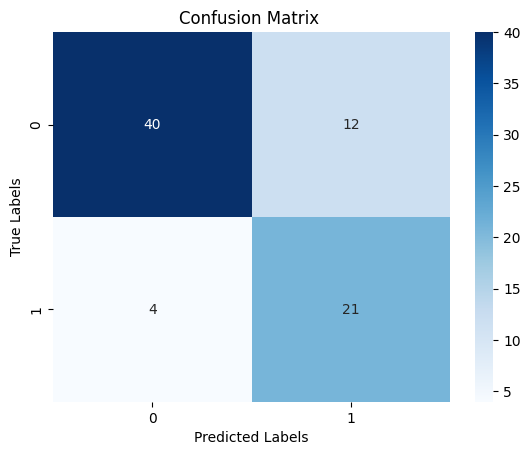

In [ ]:
# 1. Entraînement du modèle avec les paramètres par défaut
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_val)

# 2. Évaluation du modèle avec les paramètres par défaut
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))




# 3. Recherche des meilleurs hyperparamètres avec GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],   # Type de régularisation
    'C': [0.1, 1, 10, 100],                        # Paramètre de régularisation
    'solver': ['liblinear', 'saga'],                # Algorithmes de résolution
    'max_iter': [100, 200, 300]                    # Nombre maximal d'itérations
}


logreg_model = LogisticRegression()
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 4. Affichage des meilleurs hyperparamètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# 5. Évaluation du modèle avec les meilleurs hyperparamètres
best_logistic_model = grid_search.best_estimator_
y_logistic_pred_best = best_logistic_model.predict(X_val)

#6. Affichage des performances avec les meilleurs hyperparamètres
acc_best_logistic = accuracy_score(y_val, y_logistic_pred_best)
prec_best_logistic = precision_score(y_val, y_logistic_pred_best)
rec_best_logistic = recall_score(y_val, y_logistic_pred_best)
f1_best_logistic = f1_score(y_val, y_logistic_pred_best)

print("\nPerformances de la régression logistique  :")
print("Accuracy: {:.2f}%".format(acc_best_logistic * 100))
print("Precision: {:.2f}%".format(prec_best_logistic * 100))
print("Recall: {:.2f}%".format(rec_best_logistic * 100))
print("F1-Score: {:.2f}".format(f1_best_logistic))


# 7. Matrice de confusion avec les meilleurs hyperparamètres
cm_best = confusion_matrix(y_val, y_logistic_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

results['Logistic Regression'] = acc_best_logistic

# Random Forest

Accuracy: 88.31%
Precision: 80.77%
Recall: 84.00%
F1-Score: 0.82


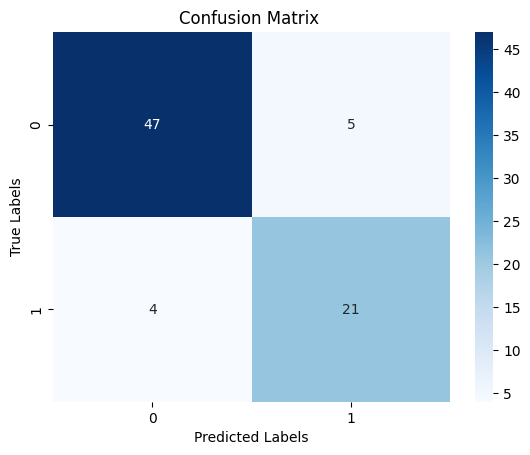

In [ ]:
# 1. Entraînement du modèle avec les paramètres par défaut
rf_model = RandomForestClassifier()# Initialisation avec les paramètres par défaut
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_val)

# 2. Évaluation du modèle avec les paramètres par défaut
acc = accuracy_score(y_val, y_rf_pred)
prec = precision_score(y_val, y_rf_pred)
rec = recall_score(y_val, y_rf_pred)
f1 = f1_score(y_val, y_rf_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

# 3. Matrice de confusion avec les meilleurs hyperparamètres
cm = confusion_matrix(y_val, y_rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

results['Random Forest'] =acc


# SVM

Accuracy: 85.71%
Precision: 73.33%
Recall: 88.00%
F1-Score: 0.80
Meilleurs paramètres trouvés :  {'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Performances avec les meilleurs hyperparamètres :
Accuracy: 85.71%
Precision: 73.33%
Recall: 88.00%
F1-Score: 0.80


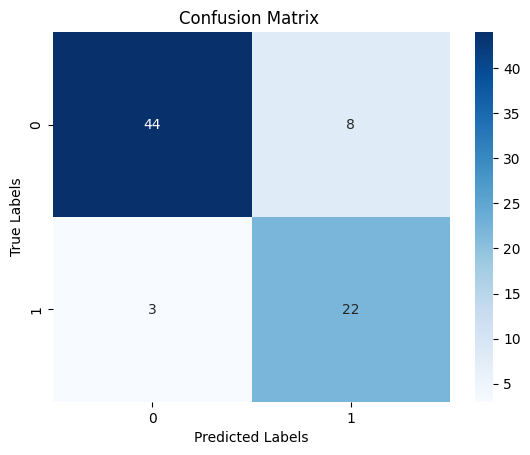

In [ ]:
# 1. Entraînement du modèle avec les paramètres par défaut
svm_model = SVC()# Initialisation avec les paramètres par défaut
svm_model.fit(X_train, y_train)
y_svm_pred = svm_model.predict(X_val)


# 2. Évaluation du modèle avec les paramètres par défaut
acc = accuracy_score(y_val, y_svm_pred)
prec = precision_score(y_val, y_svm_pred)
rec = recall_score(y_val, y_svm_pred)
f1 = f1_score(y_val, y_svm_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))


# 3. Recherche des meilleurs hyperparamètres avec GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],                # Paramètre de régularisation
    'kernel': ['linear', 'rbf', 'poly'],    # Types de noyaux à essayer
    'gamma': ['scale', 'auto'],             # Paramètre de noyau pour 'rbf' et 'poly'
    'degree': [3, 4, 5]                     # Degré du noyau polynomiale (si applicable)
}

svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 4. Affichage des meilleurs hyperparamètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# 5. Évaluation du modèle avec les meilleurs hyperparamètres
best_svm_model = grid_search.best_estimator_
y_svm_pred_best = best_svm_model.predict(X_val)

#6. Affichage des performances avec les meilleurs hyperparamètres
acc_best = accuracy_score(y_val, y_svm_pred_best)
prec_best = precision_score(y_val, y_svm_pred_best)
rec_best = recall_score(y_val, y_svm_pred_best)
f1_best= f1_score(y_val, y_svm_pred_best)

print("\nPerformances avec les meilleurs hyperparamètres :")
print("Accuracy: {:.2f}%".format(acc_best * 100))
print("Precision: {:.2f}%".format(prec_best * 100))
print("Recall: {:.2f}%".format(rec_best * 100))
print("F1-Score: {:.2f}".format(f1_best))


# 7. Matrice de confusion avec les meilleurs hyperparamètres
cm_best = confusion_matrix(y_val, y_svm_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

results['SVM'] = acc_best

# Decision tree

Accuracy: 80.52%
Precision: 67.86%
Recall: 76.00%
F1-Score: 0.72
Meilleurs paramètres trouvés :  {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}

Performances  avec les meilleurs hyperparamètres :
Accuracy: 85.71%
Precision: 73.33%
Recall: 88.00%
F1-Score: 0.80


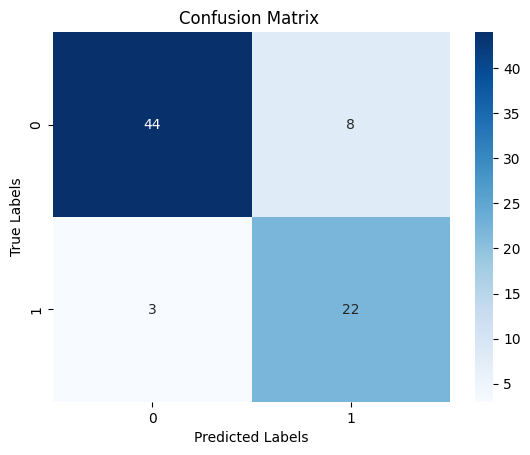

In [ ]:
# 1. Entraînement du modèle avec les paramètres par défaut
dt_model = DecisionTreeClassifier()# Initialisation avec les paramètres par défaut
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_val)

# 2. Évaluation du modèle avec les paramètres par défaut
acc = accuracy_score(y_val, y_dt_pred)
prec = precision_score(y_val, y_dt_pred)
rec = recall_score(y_val, y_dt_pred)
f1 = f1_score(y_val, y_dt_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

# 3. Recherche des meilleurs hyperparamètres avec GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],          # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],          # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],            # Nombre minimum d'échantillons par feuille
    'criterion': ['gini', 'entropy'],        # Critère pour la division
    'max_features': ['auto', 'sqrt', 'log2'] # Nombre maximal de caractéristiques à considérer pour chaque division
}

svm_model = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 4. Affichage des meilleurs hyperparamètres
print("Meilleurs paramètres trouvés : ", grid_search.best_params_)

# 5. Évaluation du modèle avec les meilleurs hyperparamètres
best_dt_model = grid_search.best_estimator_
y_dt_pred_best = best_dt_model.predict(X_val)

#6. Affichage des performances avec les meilleurs hyperparamètres
acc_best = accuracy_score(y_val, y_svm_pred_best)
prec_best = precision_score(y_val, y_svm_pred_best)
rec_best = recall_score(y_val, y_svm_pred_best)
f1_best = f1_score(y_val, y_svm_pred_best)

print("\nPerformances  avec les meilleurs hyperparamètres :")
print("Accuracy: {:.2f}%".format(acc_best * 100))
print("Precision: {:.2f}%".format(prec_best * 100))
print("Recall: {:.2f}%".format(rec_best * 100))
print("F1-Score: {:.2f}".format(f1_best))


# 7. Matrice de confusion avec les meilleurs hyperparamètres
cm_best = confusion_matrix(y_val, y_svm_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

results['Decision tree'] = acc_best


# AdaBoost

Accuracy: 83.12%
Precision: 73.08%
Recall: 76.00%
F1-Score: 0.75


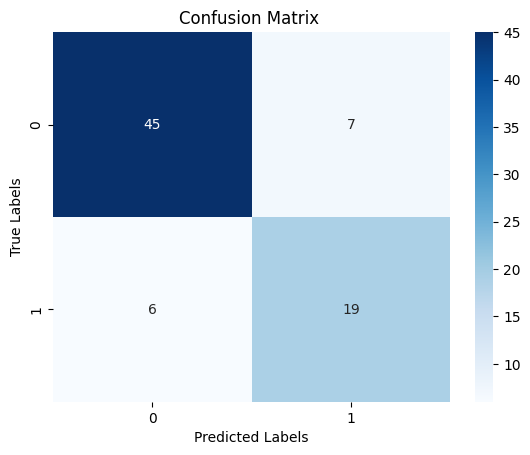

'# 3. Recherche des meilleurs hyperparamètres avec GridSearchCV\nparam_grid = {\n    \'n_estimators\': [50, 100, 150, 200],    # Nombre d\'estimateurs (arbres de décision faibles)\n    \'learning_rate\': [0.01, 0.1, 0.5, 1.0], # Taux d\'apprentissage pour ajuster la contribution de chaque arbre\n    \'algorithm\': [\'SAMME\', \'SAMME.R\'],        # Choisir l\'algorithme d\'AdaBoost\n}\n\nadaboost_model = AdaBoostClassifier(random_state=42)\ngrid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring=\'accuracy\')\ngrid_search.fit(X_train, y_train)\n\n# 4. Affichage des meilleurs hyperparamètres\nprint("Meilleurs paramètres trouvés : ", grid_search.best_params_)\n\n# 5. Évaluation du modèle avec les meilleurs hyperparamètres\nbest_ada_model = grid_search.best_estimator_\ny_ada_pred_best = best_ada_model.predict(X_val)\n\n#6. Affichage des performances avec les meilleurs hyperparamètres\nacc_best = accuracy_score(y_val, y_ada_pred_best)\nprec_best

In [ ]:
# 1. Entraînement du modèle avec les paramètres par défaut
adaboost = AdaBoostClassifier()# Initialisation avec les paramètres par défaut
adaboost.fit(X_train, y_train)
y_ada_pred = adaboost.predict(X_val)

# 2. Évaluation du modèle avec les paramètres par défaut
acc = accuracy_score(y_val, y_ada_pred)
prec = precision_score(y_val, y_ada_pred)
rec = recall_score(y_val, y_ada_pred)
f1 = f1_score(y_val, y_ada_pred)

print("Accuracy: {:.2f}%".format(acc*100))
print("Precision: {:.2f}%".format(prec*100))
print("Recall: {:.2f}%".format(rec*100))
print("F1-Score: {:.2f}".format(f1))

# 3. Matrice de confusion
cm = confusion_matrix(y_val, y_ada_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix ')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

results['AdaBoost'] = acc




# Choix du modèle

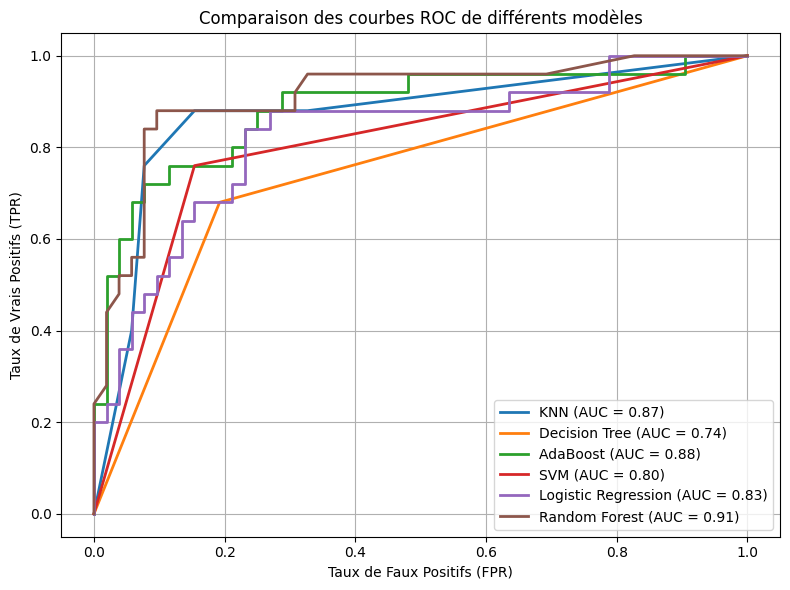

In [ ]:

models = {
    "KNN": knn_model,
    "Decision Tree": dt_model,
    "AdaBoost": adaboost,
    "SVM": svm_model,
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model
}

plt.figure(figsize=(8, 6))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_val)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_val, y_prob)

    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.title('Comparaison des courbes ROC de différents modèles')
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()

plt.show()


Dans cette partie,on a comparé les modéles précédents selon leurs accuracy pour choisir le meilleur modéle

KNN: Accuracy = 0.86
Logistic Regression: Accuracy = 0.79
Random Forest: Accuracy = 0.88
SVM: Accuracy = 0.86
Decision tree: Accuracy = 0.86


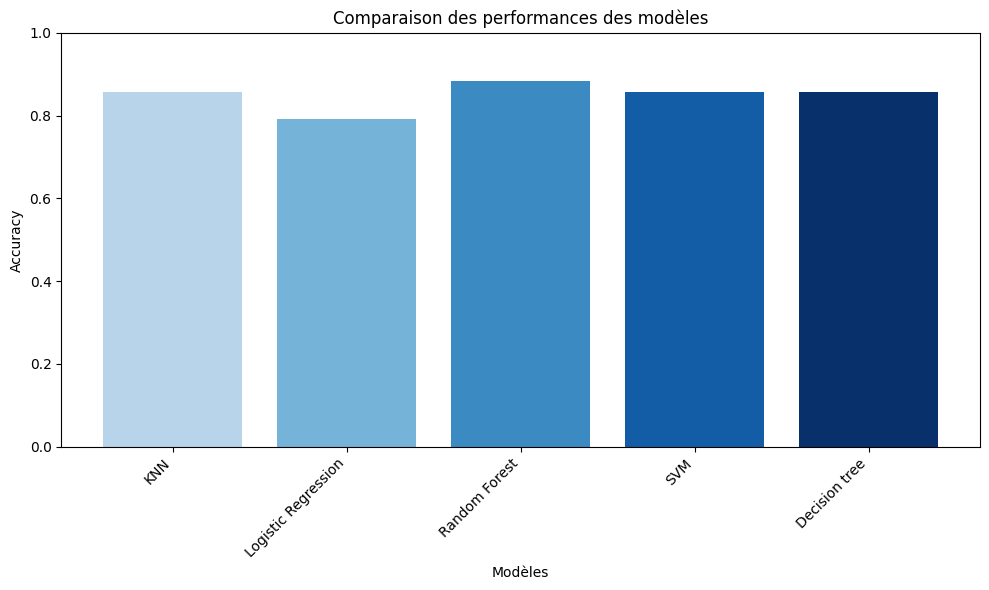


Le meilleur modèle est: Random Forest


In [ ]:
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.2f}")

best_model_name = max(results, key=results.get)
best_model = results[best_model_name]

model_names = list(results.keys())
accuracies = list(results.values())

colors = plt.cm.Blues(np.linspace(0.3, 1, len(model_names)))

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=colors)
plt.title('Comparaison des performances des modèles')
plt.xlabel('Modèles')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nLe meilleur modèle est: {best_model_name}")



# Test du modèle


Performances du modèle optimal sur le jeu de test :
Accuracy: 0.87
Precision: 0.80
Recall: 0.85
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        99
           1       0.80      0.85      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.87      0.86       154
weighted avg       0.87      0.87      0.87       154



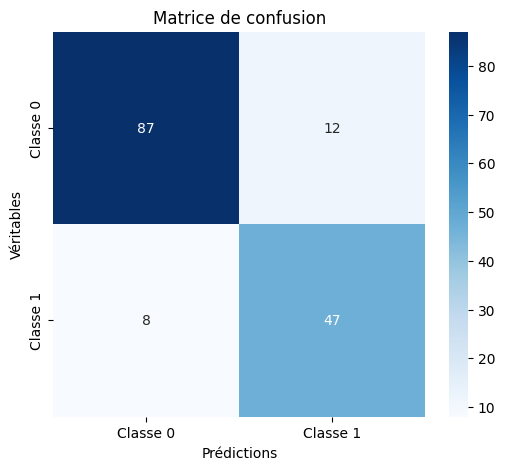

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Faire des prédictions sur le jeu de test
y_test_pred = rf_model.predict(X_test)  # Utiliser le modèle optimal pour faire des prédictions

# 2. Calcul des métriques de performance
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Affichage des performances sur le jeu de test
print(f"\nPerformances du modèle optimal sur le jeu de test :")
print(f"Accuracy: {acc_test:.2f}")
print(f"Precision: {prec_test:.2f}")
print(f"Recall: {rec_test:.2f}")
print(f"F1-Score: {f1_test:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 3. Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables')
plt.show()

